In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import ExtraTreeClassifier
import matplotlib.pyplot as plt

from aad.basemodels import IrisNN, ModelContainerPT, ModelContainerTree
from aad.datasets import get_synthetic_dataset_dict, DataContainer
from aad.utils import get_data_path

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams["figure.figsize"]=(8,8)

In [4]:
N = 5000
NUN_CLASSES = 3
NUM_FEATURES = 4

MAX_EPOCHS = 200
BATCH_SIZE = 128

In [5]:
x, y = make_classification(
    n_samples=N, n_features=NUM_FEATURES, n_informative=NUN_CLASSES,
    n_redundant=0, n_classes=NUN_CLASSES, n_clusters_per_class=1)

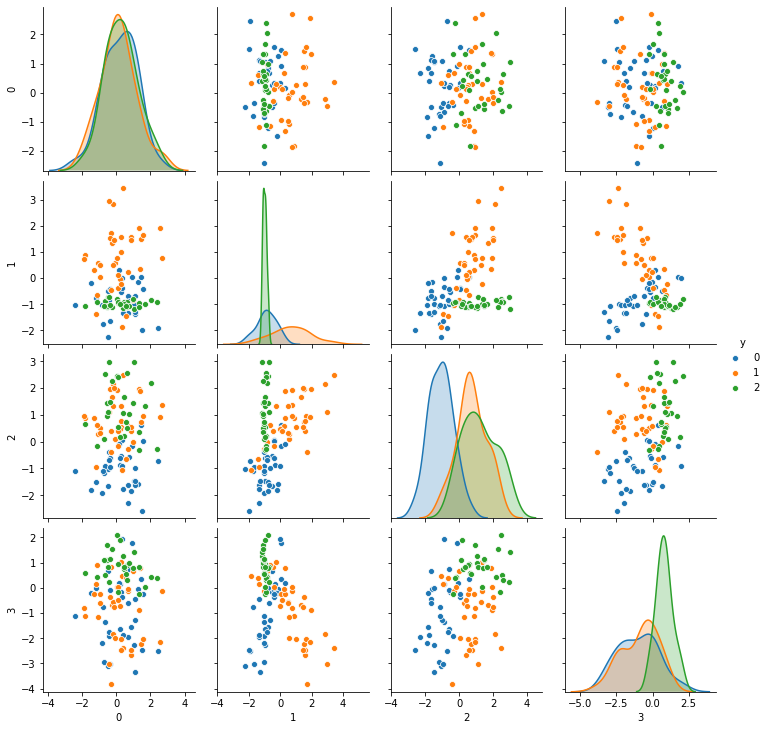

In [6]:
xframe = pd.DataFrame(x)
xframe['y'] = y
sns.pairplot(xframe[:100], hue='y')

In [7]:
U, s, VT = np.linalg.svd(x.transpose(), full_matrices=False)
S = np.diag(s)
print(U.shape, s.shape, VT.shape)

(4, 4) (4,) (4, 5000)


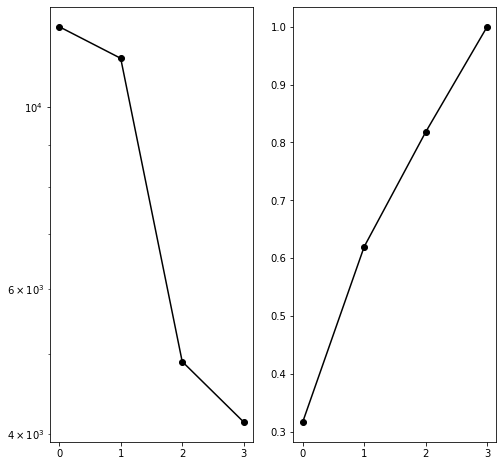

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.semilogy(s**2,'-o',color='k')
ax2 = fig.add_subplot(122)
ax2.plot(np.cumsum(s)/np.sum(s),'-o',color='k')
plt.show()

In [9]:
n_train = int(np.round(N*0.8))
x_train = np.array(x[:n_train], dtype=np.float32)
y_train = np.array(y[:n_train], dtype=np.long)
x_test = np.array(x[n_train:], dtype=np.float32)
y_test = np.array(y[n_train:], dtype=np.long)

In [10]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
accuracy = len(np.where(rfc.predict(x_test) == y_test)[0]) / (N-n_train)
accuracy

0.93

In [12]:
svm = SVC(C=1)
svm.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
accuracy = len(np.where(svm.predict(x_test) == y_test)[0]) / (N-n_train)
accuracy

0.926

In [14]:
data_dict = get_synthetic_dataset_dict(N, NUN_CLASSES, NUM_FEATURES)
data_dict

{'name': 'Synthetic',
 'type': 'numeric',
 'size': 5000,
 'num_classes': 3,
 'dim_data': (4,)}

In [15]:
dc = DataContainer(data_dict, get_data_path())
dc.x_train = x_train
dc.y_train = y_train
dc.x_test = x_test
dc.y_test = y_test

In [16]:
model = IrisNN(
    num_classes=NUN_CLASSES,
    hidden_nodes=NUM_FEATURES*4,
    num_features=NUM_FEATURES, 
)

In [17]:
mc = ModelContainerPT(model, dc)
mc.fit(max_epochs=MAX_EPOCHS, batch_size=BATCH_SIZE)

In [18]:
accuracy = mc.evaluate(dc.x_test, dc.y_test)
accuracy

0.93899999999999995

In [19]:
classifier = ExtraTreeClassifier(
    criterion='gini',
    splitter='random',
)
mc = ModelContainerTree(classifier, dc)
mc.fit()
accuracy = mc.evaluate(dc.x_test, dc.y_test)
accuracy

0.88100000000000001